# Homework setup

Install dependencies and import common libraries.

In [1]:
%pip install uv --quiet
%uv pip install pandas xlrd numpy matplotlib seaborn --quiet


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

wr.filterwarnings('ignore')

# Load the dataset
file_store_sales = '../resources/DepartmentStoreSales.csv'
file_911_travels = '../resources/Sept11Travel.xls'
df_store_sales = pd.read_csv(file_store_sales)
df_911_travels = pd.read_excel(file_911_travels, sheet_name='Sheet1')

header_store_sales  = df_store_sales.columns.tolist()
header_911_travels = df_911_travels.columns.tolist()
print("Department Store Sales Headers:", header_store_sales)
print("911 Travels Headers:", header_911_travels)

# change the 'Month' column in the travel dataset to datetime
df_911_travels['Month'] = pd.to_datetime(df_911_travels['Month'])




Department Store Sales Headers: ['Quarter', 'Sales']
911 Travels Headers: ['Month', 'Air RPM (000s)', 'Rail PM', 'Car (billions)']

Department Store Sales Data Sample:
   Quarter  Sales
0        1  50147
1        2  49325
2        3  57048
3        4  76781
4        5  48617

911 Travels Data Sample:
       Month  Air RPM (000s)    Rail PM  Car (billions)
0 1990-01-01        35153577  454115779      163.275384
1 1990-02-01        32965187  435086002      153.254409
2 1990-03-01        39993913  568289732      178.417577
3 1990-04-01        37981886  568101697      178.680686
4 1990-05-01        38419672  539628385      188.876171



# plots

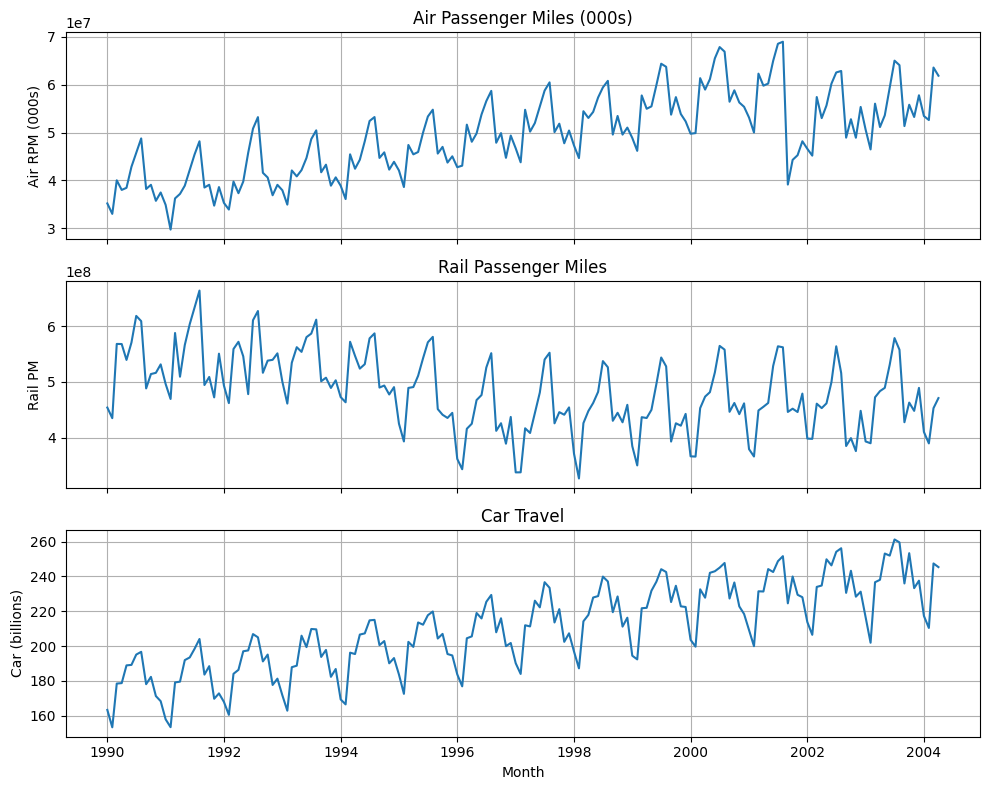

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Air travel
axes[0].plot(df_911_travels["Month"], df_911_travels["Air RPM (000s)"])
axes[0].set_title("Air Passenger Miles (000s)")
axes[0].set_ylabel("Air RPM (000s)")
axes[0].grid(True)

# Rail travel
axes[1].plot(df_911_travels["Month"], df_911_travels["Rail PM"])
axes[1].set_title("Rail Passenger Miles")
axes[1].set_ylabel("Rail PM")
axes[1].grid(True)

# Car travel
axes[2].plot(df_911_travels["Month"], df_911_travels["Car (billions)"])
axes[2].set_title("Car Travel")
axes[2].set_ylabel("Car (billions)")
axes[2].set_xlabel("Month")
axes[2].grid(True)

plt.tight_layout()
plt.show()

it seems that car and airline ravels are moving upward while trains are on their way out already, there also seems to be a lot of seasonality with a consistent 2 spikes per year for all modes of transport

# Zoom in 

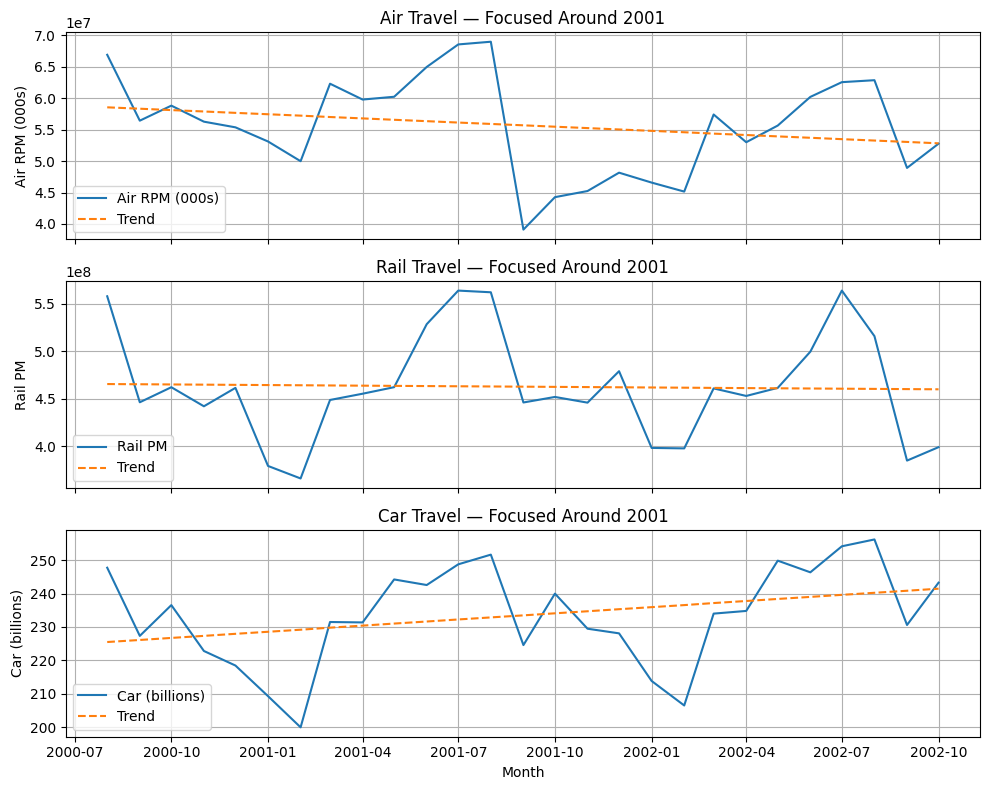

In [27]:
start_date = "2000-07-06"
end_date   = "2002-10-10"

df_focus = df_911_travels.loc[
    (df_911_travels["Month"] >= start_date) &
    (df_911_travels["Month"] <= end_date)
].copy()

x = np.arange(len(df_focus))

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

series_specs = [
    ("Air RPM (000s)", "Air RPM (000s)", "Air Travel — Focused Around 2001"),
    ("Rail PM", "Rail PM", "Rail Travel — Focused Around 2001"),
    ("Car (billions)", "Car (billions)", "Car Travel — Focused Around 2001"),
]

for ax, (col, ylabel, title) in zip(axes, series_specs):
    y = df_focus[col].to_numpy()
    trend = np.poly1d(np.polyfit(x, y, 1))(x)

    ax.plot(df_focus["Month"], y, label=col)
    ax.plot(df_focus["Month"], trend, linestyle="--", label="Trend")
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel("Month")

plt.tight_layout()
plt.show()